In [1]:
import matplotlib.pyplot as plt
from kneed import KneeLocator
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler

In [2]:
features, true_labels = make_blobs(n_samples=300, centers=3, cluster_std=2.75, random_state=42)
display(features)
display(true_labels)

array([[-8.14286966e+00, -9.21718161e+00],
       [-9.24576395e+00, -7.93763734e+00],
       [-2.47199115e-01,  5.65696609e+00],
       [ 4.04125553e+00,  4.99480603e+00],
       [-1.24844697e+01, -9.65234695e+00],
       [ 6.99844280e+00,  1.53333873e+00],
       [-2.03295008e+00,  1.00739089e+01],
       [ 5.77544034e+00,  4.22927164e-01],
       [-3.82692678e+00,  8.50372394e+00],
       [-5.78528224e+00,  1.08198086e+01],
       [-4.16389081e+00,  1.41080511e+01],
       [ 5.62167142e+00,  6.76682970e-02],
       [-1.93482274e+00,  3.62519329e+00],
       [-6.40146716e+00,  7.85751149e+00],
       [-8.66889426e+00, -8.21970440e+00],
       [-4.43984363e+00,  8.11321523e+00],
       [-1.13553689e+01, -6.74787599e+00],
       [-9.29263277e-01,  2.48591905e+00],
       [-2.24223436e+00,  1.16780599e+01],
       [-8.95340615e-01,  1.50380391e+01],
       [ 6.76940219e-01,  6.75740975e+00],
       [-2.95273333e+00,  1.01254260e+01],
       [ 7.32145810e+00,  1.56876188e+00],
       [-7.

array([2, 2, 0, 1, 2, 1, 0, 1, 0, 0, 0, 1, 0, 0, 2, 0, 2, 1, 0, 0, 0, 0,
       1, 2, 0, 2, 2, 1, 1, 0, 0, 0, 2, 0, 2, 0, 2, 1, 2, 1, 1, 0, 2, 1,
       0, 0, 2, 1, 2, 1, 1, 2, 2, 0, 2, 1, 2, 0, 1, 0, 2, 1, 1, 2, 2, 1,
       1, 2, 2, 0, 1, 2, 2, 0, 0, 2, 2, 1, 0, 1, 0, 0, 2, 0, 1, 2, 2, 0,
       1, 0, 2, 0, 2, 0, 0, 2, 2, 0, 2, 2, 1, 0, 1, 0, 0, 0, 0, 0, 1, 2,
       1, 0, 0, 0, 0, 1, 2, 1, 2, 1, 1, 1, 0, 2, 2, 2, 2, 0, 2, 2, 0, 0,
       0, 0, 0, 1, 1, 2, 0, 2, 0, 0, 2, 0, 1, 1, 1, 0, 1, 0, 0, 2, 1, 2,
       0, 1, 1, 2, 2, 0, 0, 2, 2, 2, 0, 2, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1,
       1, 0, 1, 1, 2, 0, 2, 1, 1, 2, 1, 0, 1, 1, 2, 2, 1, 2, 1, 1, 1, 1,
       0, 2, 0, 0, 1, 1, 0, 1, 2, 2, 1, 0, 0, 2, 1, 1, 2, 2, 2, 2, 0, 2,
       2, 1, 2, 2, 0, 1, 2, 2, 1, 0, 0, 2, 0, 2, 1, 1, 2, 1, 2, 2, 2, 1,
       1, 0, 2, 1, 1, 1, 2, 1, 2, 1, 2, 1, 1, 2, 1, 0, 2, 0, 0, 0, 2, 0,
       1, 1, 2, 1, 1, 0, 0, 1, 1, 1, 2, 2, 2, 0, 0, 0, 1, 1, 1, 1, 2, 1,
       2, 1, 1, 2, 0, 1, 1, 0, 2, 0, 1, 0, 2, 2])

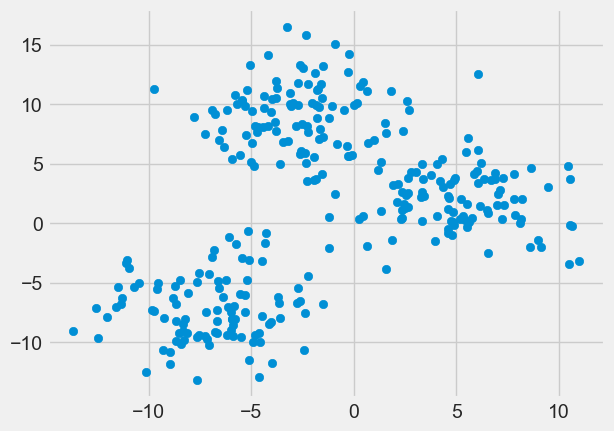

In [27]:
plt.scatter(features[:, 0], features[:, 1])

In [4]:
features[:5]

array([[ -8.14286966,  -9.21718161],
       [ -9.24576395,  -7.93763734],
       [ -0.24719911,   5.65696609],
       [  4.04125553,   4.99480603],
       [-12.48446966,  -9.65234695]])

In [5]:
true_labels[:5]

array([2, 2, 0, 1, 2])

In [6]:
scaler = StandardScaler()
scaler

StandardScaler()

In [7]:
scaled_features = scaler.fit_transform(features)
scaled_features

array([[-1.16966133e+00, -1.47111779e+00],
       [-1.36689329e+00, -1.29273268e+00],
       [ 2.42331249e-01,  6.02531821e-01],
       [ 1.00924092e+00,  5.10218097e-01],
       [-1.94607506e+00, -1.53178549e+00],
       [ 1.53807840e+00,  2.76445444e-02],
       [-7.70168154e-02,  1.21831109e+00],
       [ 1.31936735e+00, -1.27161267e-01],
       [-3.97835899e-01,  9.99406883e-01],
       [-7.48051041e-01,  1.32229919e+00],
       [-4.58095595e-01,  1.78072297e+00],
       [ 1.29186866e+00, -1.76688972e-01],
       [-5.94685812e-02,  3.19276272e-01],
       [-8.58244157e-01,  9.09316464e-01],
       [-1.26373096e+00, -1.33205649e+00],
       [-5.07444582e-01,  9.44964890e-01],
       [-1.74415656e+00, -1.12686447e+00],
       [ 1.20356867e-01,  1.60446628e-01],
       [-1.14443384e-01,  1.44195059e+00],
       [ 1.26423299e-01,  1.91037539e+00],
       [ 4.07596235e-01,  7.55947977e-01],
       [-2.41502798e-01,  1.22549324e+00],
       [ 1.59584363e+00,  3.25829933e-02],
       [-9.

In [8]:
scaled_features[:5]

array([[-1.16966133, -1.47111779],
       [-1.36689329, -1.29273268],
       [ 0.24233125,  0.60253182],
       [ 1.00924092,  0.5102181 ],
       [-1.94607506, -1.53178549]])

In [9]:
kmeans = KMeans(init="random", n_clusters=3, n_init=10, max_iter=100, random_state=42)
kmeans

KMeans(init='random', max_iter=100, n_clusters=3, random_state=42)

In [10]:
kmeans.fit(scaled_features)

KMeans(init='random', max_iter=100, n_clusters=3, random_state=42)

In [11]:
kmeans.inertia_

105.43834165205631

In [12]:
kmeans.cluster_centers_

array([[-0.20651412,  1.0689212 ],
       [-0.95632267, -1.18100061],
       [ 1.20518784,  0.08248636]])

In [13]:
kmeans.n_iter_

5

In [14]:
kmeans.labels_

array([1, 1, 0, 2, 1, 2, 0, 2, 0, 0, 0, 2, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       2, 1, 0, 1, 1, 0, 2, 0, 0, 0, 1, 0, 1, 0, 1, 2, 1, 2, 2, 0, 1, 2,
       0, 0, 1, 2, 1, 2, 2, 1, 1, 0, 1, 2, 1, 0, 2, 0, 1, 2, 2, 2, 1, 2,
       2, 1, 1, 0, 2, 1, 1, 0, 0, 1, 1, 2, 0, 2, 0, 0, 1, 0, 2, 1, 1, 0,
       2, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 2, 0, 2, 0, 0, 0, 0, 0, 2, 1,
       2, 0, 0, 0, 0, 2, 1, 0, 1, 2, 2, 2, 2, 1, 1, 1, 1, 0, 1, 1, 0, 0,
       0, 0, 0, 2, 2, 1, 0, 1, 0, 0, 1, 0, 2, 2, 2, 0, 2, 0, 0, 1, 2, 1,
       0, 2, 2, 1, 1, 0, 0, 1, 1, 1, 0, 1, 2, 0, 0, 0, 0, 0, 2, 0, 2, 2,
       2, 0, 2, 2, 1, 0, 1, 2, 2, 1, 2, 0, 1, 2, 1, 1, 2, 1, 2, 0, 2, 2,
       0, 1, 0, 0, 2, 2, 0, 2, 1, 1, 2, 0, 0, 1, 2, 2, 1, 1, 1, 1, 0, 1,
       1, 2, 1, 1, 0, 2, 1, 1, 2, 0, 0, 1, 0, 1, 2, 2, 1, 2, 1, 1, 1, 2,
       2, 0, 1, 2, 2, 2, 1, 2, 1, 2, 1, 2, 2, 1, 2, 0, 1, 0, 0, 0, 1, 0,
       2, 2, 1, 2, 2, 0, 0, 2, 2, 2, 1, 1, 1, 0, 0, 0, 2, 2, 2, 2, 1, 2,
       1, 2, 2, 1, 0, 2, 2, 0, 1, 0, 2, 0, 1, 1])

In [15]:
kmeans_kwargs = {"init": "random", "n_init": 10, "max_iter": 300, "random_state": 42}

In [16]:
sse = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
    kmeans.fit(scaled_features)
    sse.append(kmeans.inertia_)
sse

C:\Program Files\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1037: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  "KMeans is known to have a memory leak on Windows "


[600.0000000000001,
 253.32204554734835,
 105.43834165205631,
 88.64584088068726,
 73.58397075913196,
 62.20461904786361,
 54.381478239371184,
 47.03508705765566,
 42.670383869652554,
 38.66218137733374]

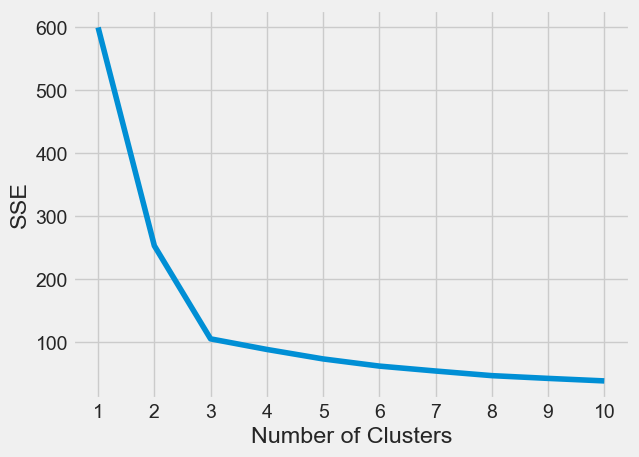

In [17]:
plt.style.use("fivethirtyeight")
plt.plot(range(1, 11), sse)
plt.xticks(range(1, 11))
plt.xlabel("Number of Clusters")
plt.ylabel("SSE")
plt.show()

In [18]:
kl = KneeLocator(range(1, 11), sse, curve="convex", direction="decreasing")
kl.elbow

3

In [19]:
# A list holds the silhouette coefficients for each k...:
silhouette_coefficients = []
# Notice you start at 2 clusters for silhouette coefficient...:
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
    kmeans.fit(scaled_features)
    score = silhouette_score(scaled_features, kmeans.labels_)
    silhouette_coefficients.append(score)

silhouette_coefficients

[0.5487995612729158,
 0.6021964082505046,
 0.49064316320000784,
 0.39886518114346253,
 0.3654615577252841,
 0.35943182189056727,
 0.3658940580679529,
 0.3713295263952624,
 0.3688690182630002]

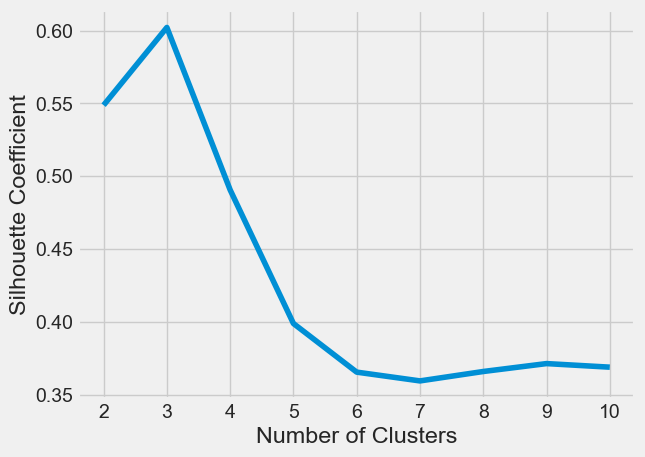

In [20]:
plt.style.use("fivethirtyeight")
plt.plot(range(2, 11), silhouette_coefficients)
plt.xticks(range(2, 11))
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Coefficient")
plt.show()

In [21]:
features2, true_labels = make_blobs(n_samples=300, centers=5, cluster_std=2.75, random_state=42)
display(features2)
display(true_labels)

array([[ 2.67781361e+00,  9.49437511e+00],
       [-2.04381194e+00,  7.30677517e+00],
       [-1.93482274e+00,  3.62519329e+00],
       [ 4.02535618e+00,  3.93667104e+00],
       [-6.16170926e+00,  9.55565453e+00],
       [-9.14722989e+00,  6.71585652e+00],
       [ 3.93216943e-01,  1.78547694e+00],
       [-6.67116466e+00, -8.74230430e+00],
       [-7.78214777e+00,  7.23361236e+00],
       [ 3.60924858e+00,  3.60307674e+00],
       [ 2.20927089e+00,  2.39591373e+00],
       [-2.54631499e+00,  6.10558107e+00],
       [ 4.42784914e+00,  2.91133761e+00],
       [-4.43984363e+00,  8.11321523e+00],
       [ 1.28014416e+00,  1.46985134e+00],
       [-5.55161880e+00,  5.72471791e+00],
       [ 4.91392009e+00,  5.88611635e-01],
       [ 5.11612638e+00,  3.03279248e+00],
       [-3.12237755e+00,  3.19478947e+00],
       [-3.58749504e+00,  4.98962002e+00],
       [ 6.33565117e-01,  1.10821020e+01],
       [ 6.90054428e+00,  7.18935039e+00],
       [-3.45166254e+00,  6.80802364e+00],
       [ 7.

array([0, 4, 0, 1, 0, 3, 4, 2, 3, 4, 1, 0, 1, 0, 4, 0, 1, 1, 4, 0, 0, 1,
       0, 4, 4, 0, 2, 4, 1, 2, 3, 4, 4, 3, 2, 1, 1, 4, 3, 1, 0, 1, 2, 3,
       4, 3, 0, 2, 4, 2, 3, 4, 2, 3, 0, 3, 1, 0, 3, 2, 0, 3, 4, 4, 2, 1,
       2, 2, 2, 2, 1, 2, 3, 4, 3, 0, 3, 3, 4, 0, 2, 0, 0, 4, 0, 2, 3, 1,
       1, 4, 4, 4, 0, 4, 0, 0, 4, 3, 1, 4, 3, 3, 1, 2, 0, 0, 0, 1, 0, 1,
       3, 4, 1, 1, 0, 0, 0, 2, 3, 3, 3, 2, 3, 3, 0, 2, 4, 4, 3, 0, 1, 3,
       1, 0, 0, 0, 0, 1, 2, 4, 0, 3, 0, 1, 4, 0, 4, 2, 1, 2, 1, 2, 2, 1,
       0, 4, 2, 3, 0, 1, 3, 3, 4, 1, 0, 3, 4, 4, 1, 4, 2, 0, 1, 1, 0, 1,
       3, 1, 2, 2, 3, 3, 1, 2, 2, 4, 0, 3, 2, 1, 4, 2, 0, 2, 2, 3, 3, 2,
       4, 1, 3, 2, 1, 1, 3, 0, 0, 2, 2, 0, 2, 3, 4, 2, 0, 1, 3, 3, 2, 4,
       3, 3, 4, 3, 4, 1, 3, 4, 3, 4, 3, 1, 1, 2, 4, 1, 1, 1, 4, 0, 3, 1,
       2, 4, 2, 3, 4, 4, 2, 2, 1, 4, 3, 2, 3, 4, 2, 4, 2, 4, 2, 0, 4, 1,
       1, 0, 4, 1, 2, 1, 3, 2, 2, 0, 0, 3, 1, 1, 4, 4, 3, 0, 0, 1, 1, 2,
       2, 2, 4, 1, 3, 1, 2, 3, 0, 3, 2, 0, 4, 0])

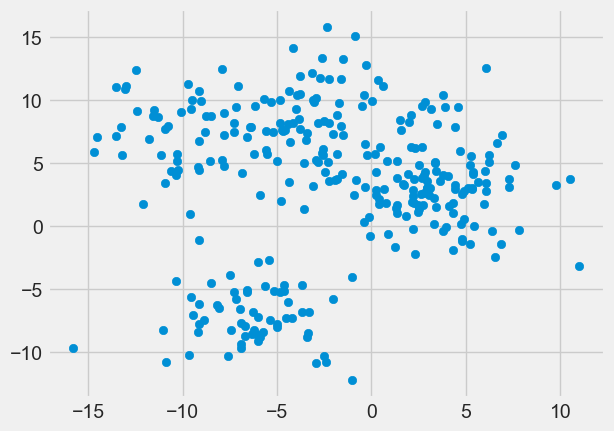

In [26]:
plt.scatter(features2[:, 0], features2[:, 1])

In [23]:
scaled_features2 = scaler.fit_transform(features2)
scaled_features2

array([[ 8.95661391e-01,  1.04090357e+00],
       [ 5.51907382e-02,  6.86682927e-01],
       [ 7.45913083e-02,  9.05536742e-02],
       [ 1.13553005e+00,  1.40988788e-01],
       [-6.77813565e-01,  1.05082606e+00],
       [-1.20924971e+00,  5.91000172e-01],
       [ 4.88992876e-01, -2.07336952e-01],
       [-7.68498925e-01, -1.91201678e+00],
       [-9.66258933e-01,  6.74836255e-01],
       [ 1.06146102e+00,  8.69725183e-02],
       [ 8.12258673e-01, -1.08493781e-01],
       [-3.42570722e-02,  4.92183127e-01],
       [ 1.20717561e+00, -2.50352933e-02],
       [-3.71313714e-01,  8.17263346e-01],
       [ 6.46869923e-01, -2.58443693e-01],
       [-5.69214711e-01,  4.30512986e-01],
       [ 1.29369844e+00, -4.01135825e-01],
       [ 1.32969207e+00, -5.36907395e-03],
       [-1.36798807e-01,  2.08618104e-02],
       [-2.19591820e-01,  3.11484436e-01],
       [ 5.31775936e-01,  1.29799155e+00],
       [ 1.64732650e+00,  6.67669266e-01],
       [-1.95413022e-01,  6.05924060e-01],
       [ 5.

In [24]:
sse2 = list()
for k in range(1, 11):
    kmeans2 = KMeans(n_clusters=k, init="random", n_init=10, max_iter=300, random_state=42)
    kmeans2.fit(scaled_features2)
    sse2.append(kmeans2.inertia_)
sse2

C:\Program Files\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1037: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  "KMeans is known to have a memory leak on Windows "


[599.9999999999998,
 356.0150153363713,
 154.92721166368105,
 109.4904293983786,
 92.56311912421198,
 79.63776703226573,
 69.96295040018693,
 63.18715966495099,
 56.06043681670099,
 50.837381137463396]

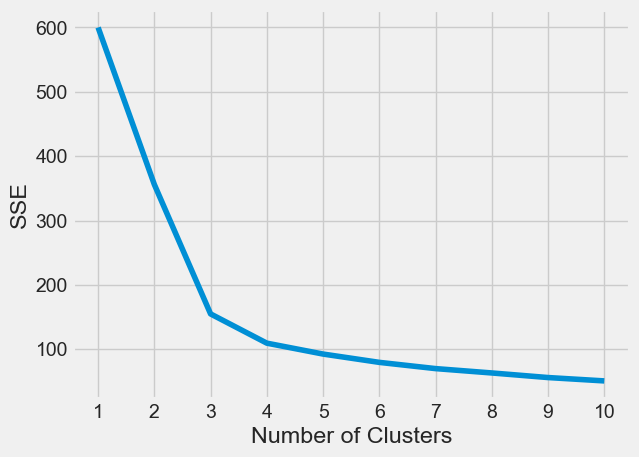

In [25]:
plt.style.use("fivethirtyeight")
plt.plot(range(1, 11), sse2)
plt.xticks(range(1, 11))
plt.xlabel("Number of Clusters")
plt.ylabel("SSE")
plt.show()